In [81]:
from statistics import mean
from typing import List

import krippendorff
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [82]:
annotation_data_user_1 = pd.read_csv("annotation_user_1.csv")
annotation_data_user_2 = pd.read_csv("annotation_user_2.csv")
annotation_data_user_3 = pd.read_csv("annotation_user_3.csv")
annotation_data_user_4 = pd.read_csv("annotation_user_4.csv")


In [83]:
annotation_data = pd.merge(annotation_data_user_1, annotation_data_user_2, on="step")
annotation_data = pd.merge(annotation_data, annotation_data_user_3, on="step")
annotation_data = pd.merge(annotation_data, annotation_data_user_4, on="step")

In [84]:
annotation_data = annotation_data.sort_values(by=["step"])
annotation_data = annotation_data.set_index("step")

In [85]:

experiment_data = pd.read_csv("ExperimentResults.csv", sep=";", index_col=0)

In [86]:
experiment_data.head()

,model,user_comment,suggestion,similarity_score,suggestion_article_id,user_comment_article_id,suggestion_0,suggestion_1,suggestion_2,suggestion_3,suggestion_4,suggestion_5
0,stsb-mpnet-base-v2,Additional air- and sea-launched missiles and ...,"""In anticipation of the missile deployment, th...",0.606054,58e1f7f27c459f24986d8045,58e1f7f27c459f24986d8045,NaN,NaN,NaN,NaN,NaN,NaN
1,stsb-mpnet-base-v2,Additional air- and sea-launched missiles and ...,Perhaps the US could tell NATO that it will ma...,0.566233,58e1f7f27c459f24986d8045,58e1f7f27c459f24986d8045,NaN,NaN,NaN,NaN,NaN,NaN
2,stsb-mpnet-base-v2,Additional air- and sea-launched missiles and ...,We don't have a no nuclear first strike policy...,0.539144,5a97ff69410cf7000162ea4a,58e1f7f27c459f24986d8045,NaN,NaN,NaN,NaN,NaN,NaN
3,stsb-mpnet-base-v2,Additional air- and sea-launched missiles and ...,"I guess perhaps we need a new toy, too. Design...",0.473584,58e1f7f27c459f24986d8045,58e1f7f27c459f24986d8045,NaN,NaN,NaN,NaN,NaN,NaN
4,stsb-mpnet-base-v2,Additional air- and sea-launched missiles and ...,This announcement of this missile at this time...,0.472123,5a97ff69410cf7000162ea4a,58e1f7f27c459f24986d8045,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
annotation_data = annotation_data.join(experiment_data, on="step")

# Box Plots
Here, we present the results of the annotation for the different models as boxplots.

In [88]:
def group_score_data(model: str, score: str) -> pd.DataFrame:
    """
    Groups annotation data for plotting
    :param model:
    :param score:
    :return:
    """
    grouped_data = []
    for user in ["_user_1", "_user_2", "_user_3", "_user_4"]:
        grouped_data.extend(annotation_data.loc[
                                (annotation_data.model == model) & (annotation_data[score + user] != 0)].loc[:,
                            score + user].to_list())
    return grouped_data



In [89]:
stsb_mpnet_base_v2_thematically = group_score_data('stsb-mpnet-base-v2', score='topic_score')
stsb_mpnet_base_v2_relevance = group_score_data('stsb-mpnet-base-v2', score='relevance_score')
stsb_mpnet_base_v2_ranking = group_score_data('stsb-mpnet-base-v2', score='ranking_score')

In [90]:
paraphrase_mpnet_base_v2_thematically = group_score_data('paraphrase-mpnet-base-v2', score='topic_score')
paraphrase_mpnet_base_v2_relevance = group_score_data('paraphrase-mpnet-base-v2', score='relevance_score')
paraphrase_mpnet_base_v2_ranking = group_score_data('paraphrase-mpnet-base-v2', score='ranking_score')

In [91]:
stsb_roberta_base_v2_thematically = group_score_data('stsb-roberta-base-v2', score='topic_score')
stsb_roberta_base_v2_relevance = group_score_data('stsb-roberta-base-v2', score='relevance_score')
stsb_roberta_base_v2_ranking = group_score_data('stsb-roberta-base-v2', score='ranking_score')

In [92]:
paraphrase_MiniLM_L12_v2_thematically = group_score_data('paraphrase-MiniLM-L12-v2', score='topic_score')
paraphrase_MiniLM_L12_v2_relevance = group_score_data('paraphrase-MiniLM-L12-v2', score='relevance_score')
paraphrase_MiniLM_L12_v2_ranking = group_score_data('paraphrase-MiniLM-L12-v2', score='ranking_score')

In [93]:
bert_thematically = group_score_data('bert-large-uncased', score='topic_score')
bert_relevance = group_score_data('bert-large-uncased', score='relevance_score')
bert_ranking = group_score_data('bert-large-uncased', score='ranking_score')

* Paraphrase-MiniL12-V2 (PML12)
* Bert-Large-Uncased (BLU)
* Paraphrase-Mpnet-Base-v2 (PMB)
* Stsb-Mpnet-Base-v2 (SMB)
* Stsb-Roberta-Base-v2 (SRB)

In [94]:
data_thematically = pd.DataFrame({'SMB': stsb_mpnet_base_v2_thematically,
                                  'BLU': bert_thematically,
                                  'PMB': paraphrase_mpnet_base_v2_thematically,
                                  'SRB': stsb_roberta_base_v2_thematically,
                                  'PML12': paraphrase_MiniLM_L12_v2_thematically
                                  })
data_relevance = pd.DataFrame({'SMB': stsb_mpnet_base_v2_relevance,
                               'BLU': bert_relevance,
                               'PMB': paraphrase_mpnet_base_v2_relevance,
                               'SRB': stsb_roberta_base_v2_relevance,
                               'PML12': paraphrase_MiniLM_L12_v2_relevance
                               })
data_ranking = pd.DataFrame({'SMB': stsb_mpnet_base_v2_ranking,
                             'BLU': bert_ranking,
                             'PMB': paraphrase_mpnet_base_v2_ranking,
                             'SRB': stsb_roberta_base_v2_ranking,
                             'PML12': paraphrase_MiniLM_L12_v2_ranking
                             })

In [95]:
data_relevance.describe()

,SMB,BLU,PMB,SRB,PML12
count,360.000000,360.000000,360.000000,360.000000,360.000000
mean,6.513889,4.577778,7.069444,6.930556,7.144444
std,2.535503,3.052841,2.264701,2.169210,2.422325
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,1.000000,5.000000,6.000000,6.000000
50%,7.000000,4.000000,7.000000,7.000000,8.000000
75%,8.000000,7.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [96]:
data_thematically.describe()

,SMB,BLU,PMB,SRB,PML12
count,360.000000,360.000000,360.000000,360.000000,360.000000
mean,7.880556,5.213889,8.380556,8.269444,8.391667
std,1.937652,3.270758,1.566416,1.569969,1.997056
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,1.000000,8.000000,7.750000,8.000000
50%,8.000000,5.000000,8.000000,8.000000,9.000000
75%,9.000000,8.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [97]:
data_ranking.describe()

,SMB,BLU,PMB,SRB,PML12
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,6.316667,5.116667,6.683333,6.333333,6.516667
std,1.672222,2.894130,1.789723,1.910423,2.197778
min,2.000000,1.000000,3.000000,1.000000,1.000000
25%,5.000000,3.000000,6.000000,5.000000,5.000000
50%,6.000000,5.500000,7.000000,7.000000,7.000000
75%,7.250000,7.250000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [98]:
sns.set(font_scale=2)

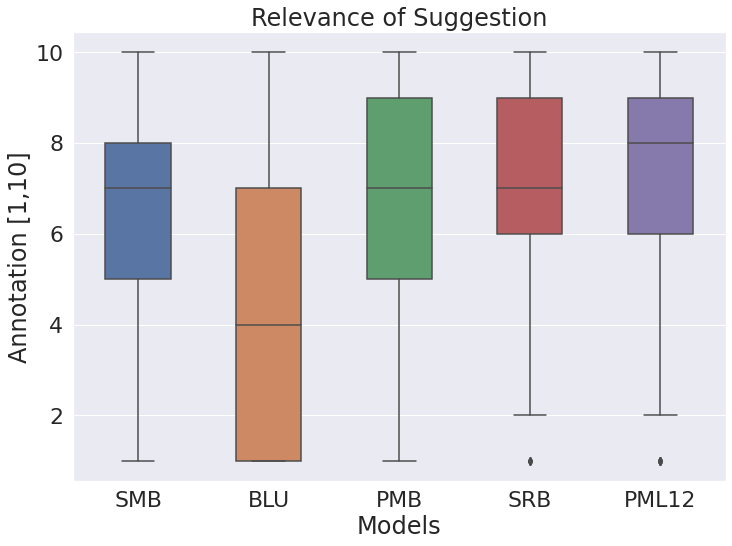

In [99]:
dims = (11.7, 8.27)
_, ax = plt.subplots(figsize=dims)
sns.boxplot(ax=ax, data=data_relevance, width=.5).set(title="Relevance of Suggestion",
                                                      xlabel="Models",
                                                      ylabel="Annotation [1,10]")
plt.savefig('Relevance-Scores.pdf')

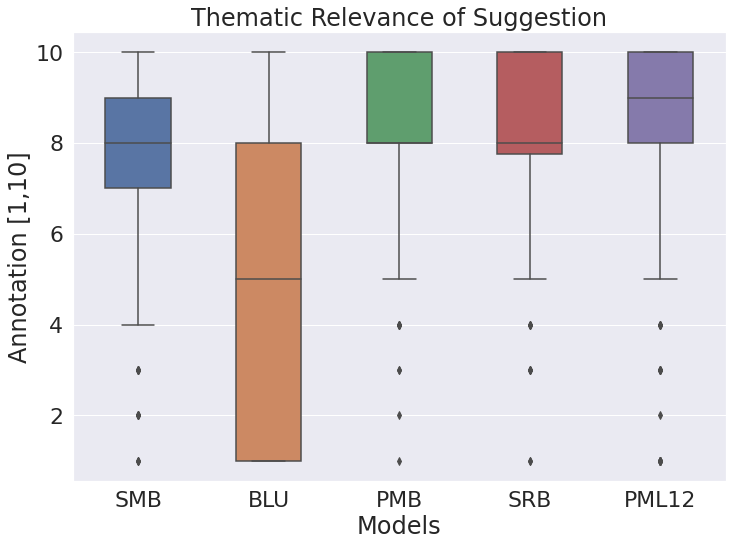

In [100]:
dims = (11.7, 8.27)
_, ax = plt.subplots(figsize=dims)
sns.boxplot(ax=ax, data=data_thematically, width=0.5).set(title="Thematic Relevance of Suggestion", xlabel="Models",
                                                          ylabel="Annotation [1,10]")

plt.savefig('Thematic-Scores.pdf')

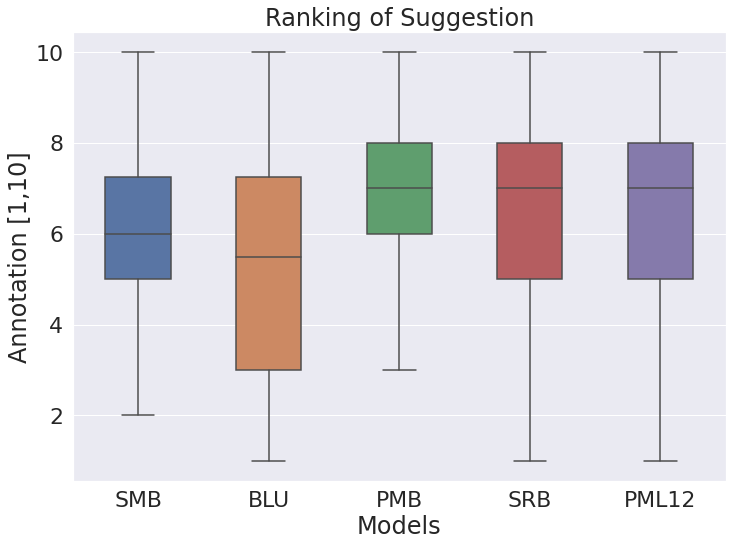

In [101]:
dims = (11.7, 8.27)
_, ax = plt.subplots(figsize=dims)
sns.boxplot(ax=ax, data=data_ranking, width=0.5).set(title="Ranking of Suggestion", xlabel="Models",
                                                     ylabel="Annotation [1,10]")

plt.savefig('Ranking-Scores.pdf')

# Krippendorf Alpha

Here, we verify how well the annotators agreed on the performance of the model. We compute the Krippendorf Alpha of
the binary classification if the score of the annotation is greater or equal to six.


In [102]:
def is_score_good(score):
    """
    Checks if score is greater or equal to six to learn how good the annotators considered the proposals
    :param score:
    :return:
    """
    return 1 if score >= 6 else 0

In [103]:
user_1_relevance = annotation_data.relevance_score_user_1.map(is_score_good).to_list()
user_2_relevance = annotation_data.relevance_score_user_2.map(is_score_good).to_list()
user_3_relevance = annotation_data.relevance_score_user_3.map(is_score_good).to_list()
user_4_relevance = annotation_data.relevance_score_user_4.map(is_score_good).to_list()

user_1_topic = annotation_data.topic_score_user_1.map(is_score_good).to_list()
user_2_topic = annotation_data.topic_score_user_2.map(is_score_good).to_list()
user_3_topic = annotation_data.topic_score_user_3.map(is_score_good).to_list()
user_4_topic = annotation_data.topic_score_user_4.map(is_score_good).to_list()

user_1_ranking = annotation_data.ranking_score_user_1.map(is_score_good).to_list()
user_2_ranking = annotation_data.ranking_score_user_2.map(is_score_good).to_list()
user_3_ranking = annotation_data.ranking_score_user_3.map(is_score_good).to_list()
user_4_ranking = annotation_data.ranking_score_user_4.map(is_score_good).to_list()

relevance_reliability = [user_1_relevance, user_2_relevance,
                         user_3_relevance, user_4_relevance]
thematic_reliability = [user_1_topic, user_2_topic, user_3_topic, user_4_topic]
ranking_reliability = [user_1_ranking, user_2_ranking, user_3_ranking, user_4_ranking]


In [104]:
relevance_alpha = krippendorff.alpha(reliability_data=relevance_reliability,
                                     level_of_measurement='nominal')
thematic_alpha = krippendorff.alpha(reliability_data=thematic_reliability,
                                    level_of_measurement='nominal')
ranking_alpha = krippendorff.alpha(reliability_data=ranking_reliability,
                                   level_of_measurement='nominal')

In [105]:
print(f"Krippendorf Alpha of relevance annotation: {relevance_alpha}")

Krippendorf Alpha of relevance annotation: 0.4642154518921394


In [106]:
print(f"Krippendorf Alpha of thematically relevance annotation: {thematic_alpha}")

Krippendorf Alpha of thematically relevance annotation: 0.7023798526966026


In [107]:
print(f"Krippendorf Alpha of ranking annotation: {ranking_alpha}")


Krippendorf Alpha of ranking annotation: 0.6970634365860189


# Percentage of annotation scores greater or equal to six


In [108]:
def compute_percentage_of_good_suggestions(scores) -> float:
    """
    Compute percentage of suggestions with annotation greater or equal to six
    :param scores:
    :return: Percentage for model
    """
    results = {}
    models = ['SMB',
              'BLU',
              'PML12',
              'SRB',
              'PMB']
    for model in models:
        results[model] = sum(list(map(is_score_good, scores[model].to_list()))) / len(scores[model].to_list())
    return results

In [109]:
pd.DataFrame({"Relevance": compute_percentage_of_good_suggestions(data_relevance),
              "Thematically": compute_percentage_of_good_suggestions(data_thematically),
              "Ranking": compute_percentage_of_good_suggestions(data_ranking)}).transpose()


,SMB,BLU,PML12,SRB,PMB
Relevance,0.708333,0.405556,0.766667,0.783333,0.747222
Thematically,0.905556,0.491667,0.930556,0.955556,0.952778
Ranking,0.716667,0.500000,0.700000,0.683333,0.766667


# Divergence of user annotations

## Compute the mean variance of scores per row

We want to examine how much the annotation of the annotators scatter for their assessment. Therefore, we compute the mean over all annotators for the different scoring dimensions per row.
Then we compute the difference of every annotator to that mean per row in the annotation and calculate with this the
mean divergence for the annotators.

In [110]:
def compute_row_mean_of_scores(row) -> [float, float, float]:
    """
    Computes difference of every user to mean of all annotators for a row
    :param row: Row of pandas DataFrame
    :return: Mean difference for all annotators for relevance annotation, thematically annotation, and ranking annotation
    """
    relevance_score_names = ["relevance_score_user_1", "relevance_score_user_2", "relevance_score_user_3",
                             "relevance_score_user_4"]
    topic_score_names = ["topic_score_user_1", "topic_score_user_2", "topic_score_user_3", "topic_score_user_4"]
    ranking_score_names = ["ranking_score_user_1", "ranking_score_user_2", "ranking_score_user_3",
                           "ranking_score_user_4"]

    relevance_row_mean = row.loc[relevance_score_names].mean()
    topic_row_mean = row.loc[topic_score_names].mean()
    ranking_row_mean = row.loc[ranking_score_names].mean()

    relevance_distance_to_row_mean = mean([abs(relevance_row_mean - row[score]) for score in relevance_score_names])
    topic_distance_to_row_mean = mean([abs(topic_row_mean - row[score]) for score in topic_score_names])
    ranking_distance_to_row_mean = mean([abs(ranking_row_mean - row[score]) for score in ranking_score_names])

    return pd.Series([relevance_distance_to_row_mean, topic_distance_to_row_mean, ranking_distance_to_row_mean])


results = annotation_data.apply(compute_row_mean_of_scores, axis="columns")

annotation_data["relevance_annotation_mean"] = results.loc[:, 0]
annotation_data["topic_annotation_mean"] = results.loc[:, 1]
annotation_data["ranking_annotation_mean"] = results.loc[:, 2]

In [111]:
print(f"Relevance Score: \n{annotation_data.relevance_annotation_mean.describe()}\n")
print(f"Topic Score: \n {annotation_data.topic_annotation_mean.describe()} \n")
print(f"Ranking Score: \n {annotation_data.ranking_annotation_mean.describe()}\n")

Relevance Score: 
count    525.000000
mean       1.211667
std        0.800905
min        0.000000
25%        0.750000
50%        1.250000
75%        1.750000
max        3.250000
Name: relevance_annotation_mean, dtype: float64

Topic Score: 
 count    525.000000
mean       0.968333
std        0.753477
min        0.000000
25%        0.500000
50%        0.875000
75%        1.250000
max        3.750000
Name: topic_annotation_mean, dtype: float64 

Ranking Score: 
 count    525.000000
mean       0.190000
std        0.514492
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: ranking_annotation_mean, dtype: float64



## Annototor self agreement for duplicate suggestions

Some models propose the same suggestions for a comment. Therefore, we check here if the annotators are consistent with
them self for the assessment of these duplicate statements.

For this, we compute for the relevance annotation and thematically annotation how much the annotators differ in their
scoring of the same suggestions proposed by different model. Finnaly, we compute the mean over all annotators.


In [112]:
def compute_mean_deviation(deviation_values: List) -> float:
    """
    Computes mean deviation for given values
    :param deviation_values: Annotation scores for one suggestion that appears multiple times for different models
    :return: Mean of annotation scores
    """
    mean_annotation = mean(deviation_values)
    return mean(list(map(lambda x: abs(mean_annotation - x), deviation_values)))


In [113]:
suggestion_set = experiment_data.loc[:, "suggestion"].unique()


def compute_self_user_agreement(user: str):
    """
    Computes the user self agreement for suggestions that appear for multiple embedding models
    :param user: String addition to select data for given user
    :return: Mean of deviation of user annotations for same suggestion for different model
    """
    relevance_deviation_means = []
    thematic_deviation_means = []

    for suggestion in suggestion_set:
        indices = experiment_data.index[experiment_data["suggestion"] == suggestion]
        if len(indices) > 1:
            relevance_deviation = annotation_data["relevance_score" + user].iloc[indices].to_list()
            thematic_deviation = annotation_data["topic_score" + user].iloc[indices].to_list()

            relevance_deviation_means.append(compute_mean_deviation(relevance_deviation))
            thematic_deviation_means.append(compute_mean_deviation(thematic_deviation))

    user_relevance_deviation_mean = mean(relevance_deviation_means)
    user_thematic_deviation_mean = mean(thematic_deviation_means)
    return user_relevance_deviation_mean, user_thematic_deviation_mean


In [114]:
all_annotator_relevance_mean = mean(
    [compute_self_user_agreement("_user_1")[0], compute_self_user_agreement("_user_2")[0],
     compute_self_user_agreement("_user_3")[0], compute_self_user_agreement("_user_4")[0]])

all_annotator_thematic_mean = mean(
    [compute_self_user_agreement("_user_1")[1], compute_self_user_agreement("_user_2")[1],
     compute_self_user_agreement("_user_3")[1], compute_self_user_agreement("_user_4")[1]])

print(f"The mean self agreement deviation for relevance for all annotators is {all_annotator_relevance_mean}")
print(f"The mean self agreement deviation for thematic for all annotators is {all_annotator_thematic_mean}")


The mean self agreement deviation for relevance for all annotators is 0.695787037037037
The mean self agreement deviation for thematic for all annotators is 0.5287698412698413


In [115]:
## Long and short comments



In [116]:
def is_comment_short(text: str):
    return True if len(text.split(" ")) < 50 else False

In [117]:
def is_comment_long(text: str):
    return True if len(text.split(" ")) > 50 else False



In [118]:
def average_score_for_comment_length(method, model):
    indexes = experiment_data[(experiment_data.user_comment.map(method)) & (
            experiment_data.model == model) & (experiment_data.similarity_score >= 0)].index.to_list()

    ranking_indexes = experiment_data[(experiment_data.user_comment.map(method)) & (
            experiment_data.model == model) & (experiment_data.similarity_score < 0)].index.to_list()


    relevance_scores = mean(list(map(lambda x: annotation_data.iloc[indexes][x].mean(),
                                     ["relevance_score_user_1", "relevance_score_user_2", "relevance_score_user_3",
                                      "relevance_score_user_4"])))
    thematic_scores = mean(list(map(lambda x: annotation_data.iloc[indexes][x].mean(),
                                    ["topic_score_user_1", "topic_score_user_2", "topic_score_user_3",
                                     "topic_score_user_4"])))
    ranking_scores = mean(list(map(lambda x: annotation_data.iloc[ranking_indexes][x].mean(),
                                   ["ranking_score_user_1", "ranking_score_user_2", "ranking_score_user_3",
                                    "ranking_score_user_4"])))

    return int(relevance_scores), int(thematic_scores), int(ranking_scores)

In [119]:
SMB_short_relevance_scores, SMB_short_thematic_scores, SMB_short_ranking_scores = average_score_for_comment_length(
    is_comment_short, 'stsb-mpnet-base-v2')
SMB_long_relevance_scores, SMB_long_thematic_scores, SMB_long_ranking_scores = average_score_for_comment_length(
    is_comment_long, 'stsb-mpnet-base-v2')

PML12_short_relevance_scores, PML12_short_thematic_scores, PML12_short_ranking_scores = average_score_for_comment_length(
    is_comment_short, 'paraphrase-MiniLM-L12-v2')
PML12_long_relevance_scores, PML12_long_thematic_scores, PML12_long_ranking_scores = average_score_for_comment_length(
    is_comment_long, 'paraphrase-MiniLM-L12-v2')

BLU_short_relevance_scores, BLU_short_thematic_scores, BLU_short_ranking_scores = average_score_for_comment_length(
    is_comment_short, 'bert-large-uncased')
BLU_long_relevance_scores, BLU_long_thematic_scores, BLU_long_ranking_scores = average_score_for_comment_length(
    is_comment_long, 'bert-large-uncased')

PMB_short_relevance_scores, PMB_short_thematic_scores, PMB_short_ranking_scores = average_score_for_comment_length(
    is_comment_short, 'paraphrase-mpnet-base-v2')
PMB_long_relevance_scores, PMB_long_thematic_scores, PMB_long_ranking_scores = average_score_for_comment_length(
    is_comment_long, 'paraphrase-mpnet-base-v2')

SRB_short_relevance_scores, SRB_short_thematic_scores, SRB_short_ranking_scores = average_score_for_comment_length(
    is_comment_short, 'stsb-roberta-base-v2')
SRB_long_relevance_scores, SRB_long_thematic_scores, SRB_long_ranking_scores = average_score_for_comment_length(
    is_comment_long, 'stsb-roberta-base-v2')


In [120]:
pd.DataFrame({'Relevance (short/long)': [(SMB_short_relevance_scores, SMB_long_relevance_scores),
                            (PML12_short_relevance_scores, PML12_long_relevance_scores),
                            (BLU_short_relevance_scores, BLU_long_relevance_scores),
                            (PMB_short_relevance_scores, PMB_long_relevance_scores),
                            (SRB_short_relevance_scores, SRB_long_relevance_scores)],
              'Thematic (short/long)': [(SMB_short_thematic_scores, SMB_long_thematic_scores),
                           (PML12_short_thematic_scores, PML12_long_thematic_scores),
                           (BLU_short_thematic_scores, BLU_long_thematic_scores),
                           (PMB_short_thematic_scores, PMB_long_thematic_scores),
                           (SRB_short_thematic_scores, SRB_long_thematic_scores)],
              'Ranking (short/long)': [(SMB_short_ranking_scores,SMB_long_ranking_scores),
                          (PML12_short_ranking_scores,PML12_long_ranking_scores),
                          (BLU_short_ranking_scores,BLU_long_ranking_scores),
                          (PMB_short_ranking_scores, PMB_long_ranking_scores),
                          (SRB_short_ranking_scores, SRB_long_ranking_scores)]},
             index=['stsb-mpnet-base-v2', 'paraphrase-MiniLM-L12-v2', 'bert-large-uncased', 'paraphrase-mpnet-base-v2',
                    'stsb-roberta-base-v2'])






,Relevance (short/long),Thematic (short/long),Ranking (short/long)
stsb-mpnet-base-v2,"(6, 6)","(8, 7)","(6, 6)"
paraphrase-MiniLM-L12-v2,"(6, 7)","(8, 8)","(5, 6)"
bert-large-uncased,"(3, 4)","(4, 5)","(4, 5)"
paraphrase-mpnet-base-v2,"(6, 7)","(8, 8)","(6, 6)"
stsb-roberta-base-v2,"(7, 6)","(8, 8)","(6, 6)"
